In [6]:
import pickle

TAXONOMY_TREE_PATH = 'taxonomy/tree_4.pkl'

In [7]:
# http://python-future.org/compatible_idioms.html#stringio
#from StringIO import StringIO
from io import BytesIO
from IPython.display import Image, display
import pygraphviz


def display_graph(G):
    # https://github.com/chebee7i/nxpd/blob/master/nxpd/ipythonsupport.py
    imgbuf = BytesIO()
    G.draw(imgbuf, format='png', prog='dot')
    img = Image(imgbuf.getvalue())
    display(img)


def get_graphviz_agraph(tree):
    # XXX: do not use networkx.DiGraph, because it cannot
    # gurrentee the order.
    # https://networkx.github.io/documentation/networkx-1.9/_modules/networkx/drawing/nx_agraph.html#to_agraph
    G = pygraphviz.AGraph(directed=True)
    G.graph_attr["rankdir"] = "LR"
    G.graph_attr["splines"] = "ortho"
    # http://www.graphviz.org/content/attrs#dordering
        
    # iterate tree and add edges
    def iterate_create_graph(G, node):
        G.add_node(node.value, shape='box', label=node.synonyms[0], fillcolor='#E01A4F', style='filled', fontcolor = 'white')
        for child in node.children:
            iterate_create_graph(G, child)
            G.add_edge(node.value, child.value)

    iterate_create_graph(G, tree)

    G.graph_attr["ordering"] = "out"
    G.layout(prog='dot')

    return G
        

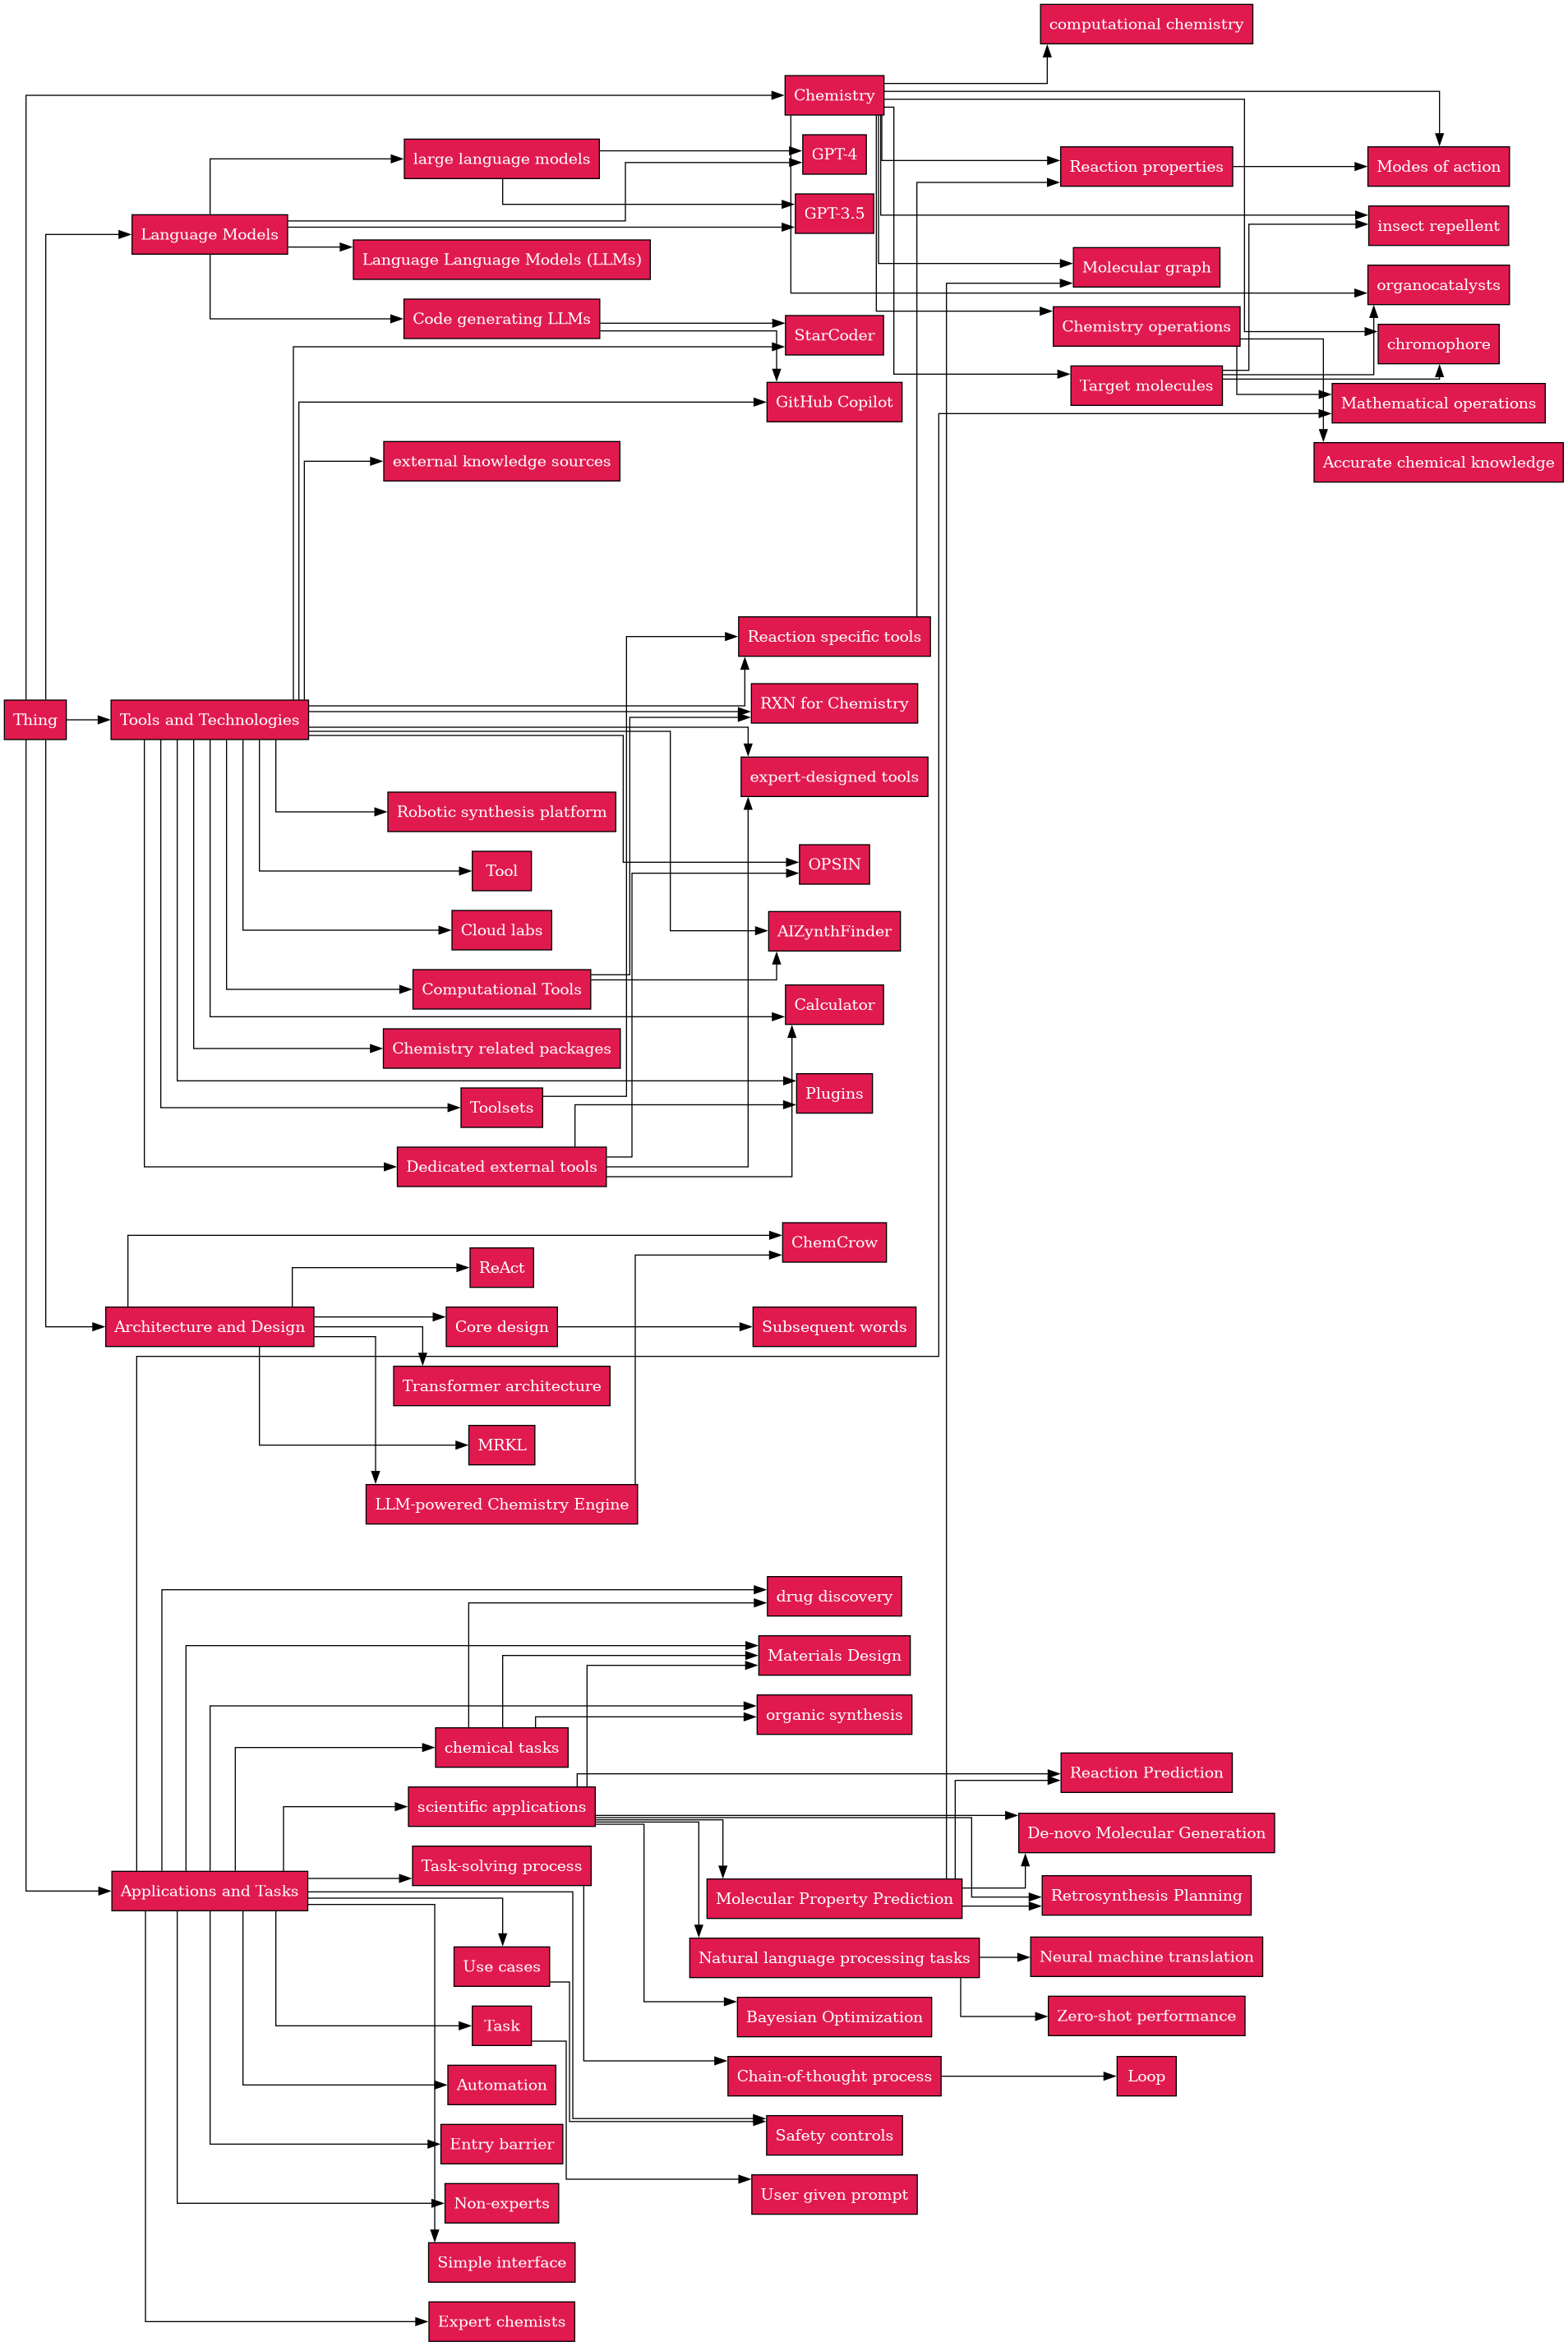

In [8]:
with open(TAXONOMY_TREE_PATH, 'rb') as f:
    tree = pickle.load(f)
G = get_graphviz_agraph(tree)
display_graph(G)